In [2]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26800 sha256=7df97e388ada3c5420505d746a81dda8a2d6b36a5efc7d48a373a32f3c6fc405
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\68\5d\a5\edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [3]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
data = pd.read_csv('airbnb.csv')

In [10]:
data

,Unnamed: 0,listing_id,date,reviewer_name,comments,room_type,property_type,market,price,Star_rating_scale5,RevHasHostName,RevRefsByPronoun
0,0,10000137.0,2018-05-28T00:00:00Z,Balal,I had a great stay over Memorial Day Weekend. ...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,0.0
1,1,10000137.0,2018-06-05T00:00:00Z,Jessica,Ben's place was a great space for the two of u...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,0.0
2,2,10000137.0,2018-05-14T00:00:00Z,David,"Great space, and great location! It's close t...",Entire home/apt,Apartment,New York,120.0,4.85,1.0,1.0
3,3,10000137.0,2018-08-19T00:00:00Z,Briana,Hello Ben! ..Thank you for the lovely stay. Yo...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,1.0
4,4,10000137.0,2018-06-26T00:00:00Z,Tricia,Pretty good sized studio in a great location -...,Entire home/apt,Apartment,New York,120.0,4.85,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1664928.0,2015-08-16T00:00:00Z,Sashi,It was an amazing home with wonderful hosts. C...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0
1048571,1048571,1664928.0,2016-11-24T00:00:00Z,Cord,Such terrific accommodations. A quick walk to ...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0
1048572,1048572,1664928.0,2017-08-14T00:00:00Z,Diane,Wouldn't hesitate to recommend this gem in Ers...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,1.0
1048573,1048573,1664928.0,2015-10-25T00:00:00Z,Hathaway,"Absolutely lovely place. Tranquil, peaceful, a...",Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0


# Checking null values

In [5]:
data.isnull().sum()

Unnamed: 0                0
listing_id                0
date                      0
reviewer_name             1
comments                  0
room_type                 0
property_type             0
market                12797
price                     0
Star_rating_scale5        0
RevHasHostName            0
RevRefsByPronoun          0
dtype: int64

In [6]:
# Data Cleaning: Remove any rows with missing values
data_cleaned = data.dropna()

In [8]:
data_cleaned.isnull().sum()

Unnamed: 0            0
listing_id            0
date                  0
reviewer_name         0
comments              0
room_type             0
property_type         0
market                0
price                 0
Star_rating_scale5    0
RevHasHostName        0
RevRefsByPronoun      0
dtype: int64

In [9]:
data_cleaned

,Unnamed: 0,listing_id,date,reviewer_name,comments,room_type,property_type,market,price,Star_rating_scale5,RevHasHostName,RevRefsByPronoun
0,0,10000137.0,2018-05-28T00:00:00Z,Balal,I had a great stay over Memorial Day Weekend. ...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,0.0
1,1,10000137.0,2018-06-05T00:00:00Z,Jessica,Ben's place was a great space for the two of u...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,0.0
2,2,10000137.0,2018-05-14T00:00:00Z,David,"Great space, and great location! It's close t...",Entire home/apt,Apartment,New York,120.0,4.85,1.0,1.0
3,3,10000137.0,2018-08-19T00:00:00Z,Briana,Hello Ben! ..Thank you for the lovely stay. Yo...,Entire home/apt,Apartment,New York,120.0,4.85,1.0,1.0
4,4,10000137.0,2018-06-26T00:00:00Z,Tricia,Pretty good sized studio in a great location -...,Entire home/apt,Apartment,New York,120.0,4.85,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1664928.0,2015-08-16T00:00:00Z,Sashi,It was an amazing home with wonderful hosts. C...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0
1048571,1048571,1664928.0,2016-11-24T00:00:00Z,Cord,Such terrific accommodations. A quick walk to ...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0
1048572,1048572,1664928.0,2017-08-14T00:00:00Z,Diane,Wouldn't hesitate to recommend this gem in Ers...,Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,1.0
1048573,1048573,1664928.0,2015-10-25T00:00:00Z,Hathaway,"Absolutely lovely place. Tranquil, peaceful, a...",Entire home/apt,Apartment,Sydney,175.0,4.85,0.0,0.0


# Data Transformation: Calculate average price for each combination of room type, property type, and market

In [12]:
query_avg_price = """
SELECT
    room_type,
    property_type,
    market,
    AVG(price) AS avg_price
FROM
    data_cleaned
GROUP BY
    room_type,
    property_type,
    market;
"""

In [13]:
avg_price_by_type_market = sqldf(query_avg_price, locals())

In [15]:
# Print results
print("Average Price by Room Type, Property Type, and Market:")
avg_price_by_type_market

Average Price by Room Type, Property Type, and Market:


,room_type,property_type,market,avg_price
0,Entire home/apt,Apartment,Amsterdam,151.254680
1,Entire home/apt,Apartment,Birmingham,89.000000
2,Entire home/apt,Apartment,Central Florida Atlantic Coast,90.000000
3,Entire home/apt,Apartment,Coastal Orange County,125.000000
4,Entire home/apt,Apartment,D.C.,79.000000
...,...,...,...,...
355,Shared room,Serviced apartment,New York,57.000000
356,Shared room,Townhouse,London,65.000000
357,Shared room,Townhouse,Los Angeles,40.882353
358,Shared room,Townhouse,New York,32.418699


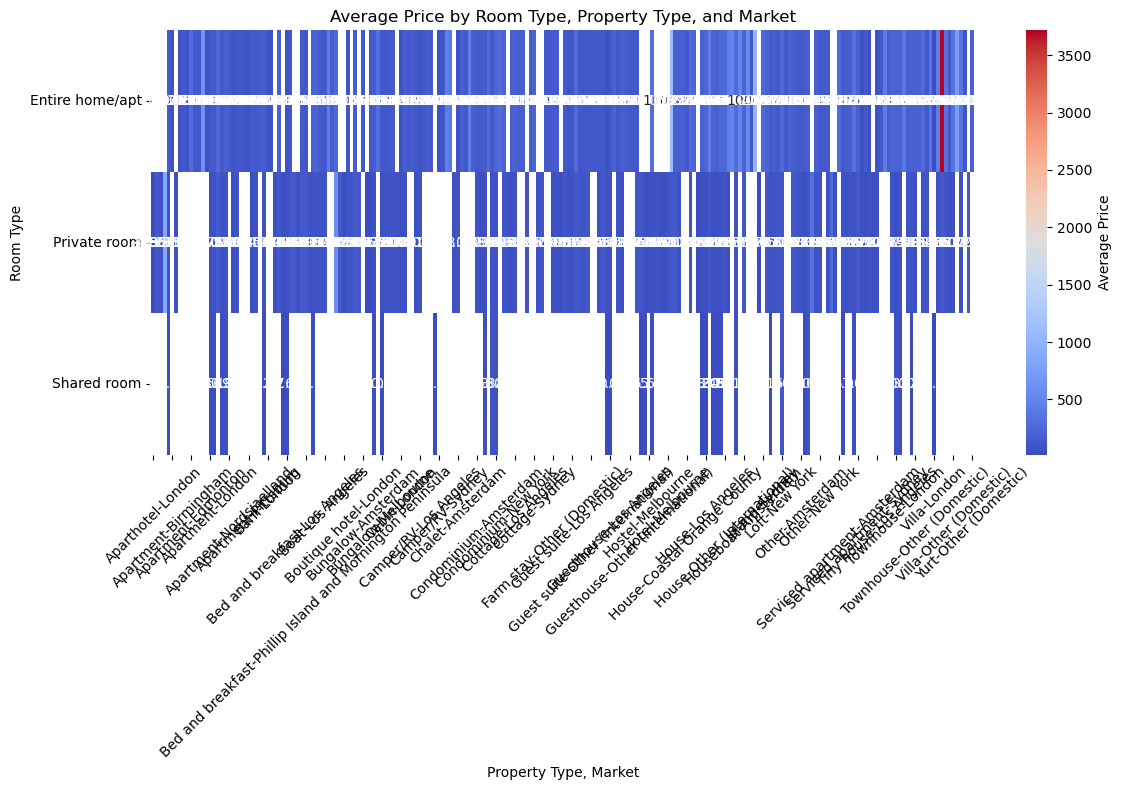

In [20]:
# Pivot the DataFrame for easier visualization
pivot_df = avg_price_by_type_market.pivot_table(index='room_type', columns=['property_type', 'market'], values='avg_price')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Room Type, Property Type, and Market')
plt.xlabel('Property Type, Market')
plt.ylabel('Room Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# calculate the average number of reviews per listing in each market

In [17]:

query_avg_reviews_per_listing = """
SELECT
    market,
    AVG(RevHasHostName) AS avg_reviews_per_listing
FROM
    data_cleaned
GROUP BY
    market;
"""
avg_reviews_per_listing_by_market = sqldf(query_avg_reviews_per_listing, locals())

In [19]:
print("Average Number of Reviews per Listing in Each Market:")
avg_reviews_per_listing_by_market

Average Number of Reviews per Listing in Each Market:


,market,avg_reviews_per_listing
0,Amsterdam,0.605030
1,Birmingham,1.000000
2,Catskills and Hudson Valley,0.833333
3,Central Florida Atlantic Coast,0.710526
4,Coastal Orange County,0.666667
5,D.C.,0.850000
6,Edmonton,0.428571
7,Flims,0.625000
8,Fontana,0.640000
9,Fresno,0.766234


# Visualization of the result

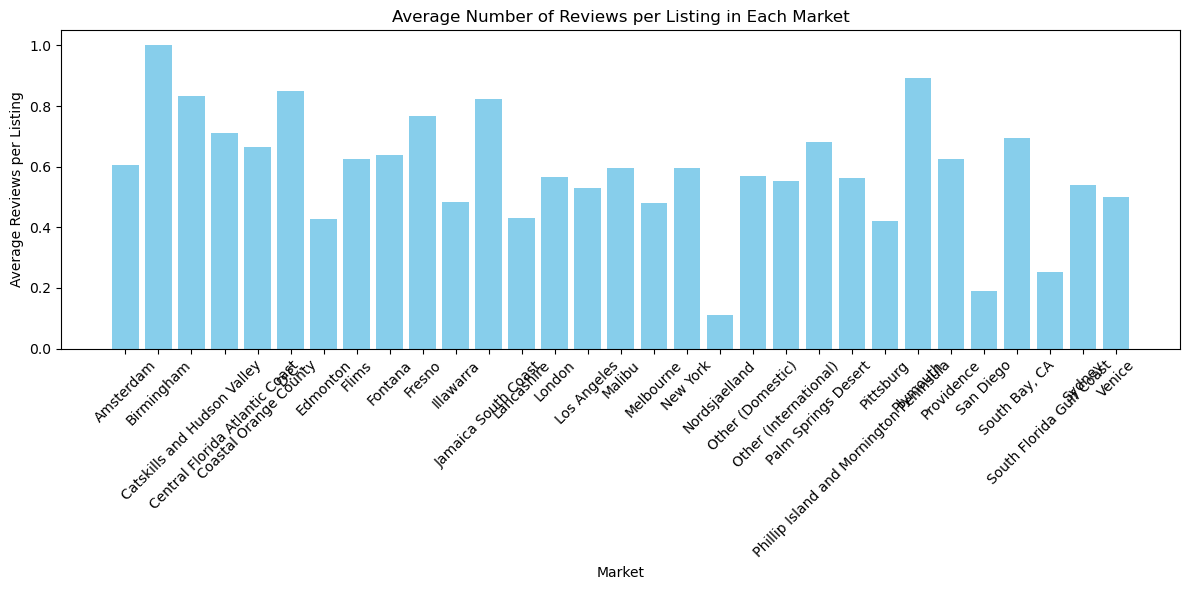

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(avg_reviews_per_listing_by_market['market'], avg_reviews_per_listing_by_market['avg_reviews_per_listing'], color='skyblue')
plt.xlabel('Market')
plt.ylabel('Average Reviews per Listing')
plt.title('Average Number of Reviews per Listing in Each Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of prices

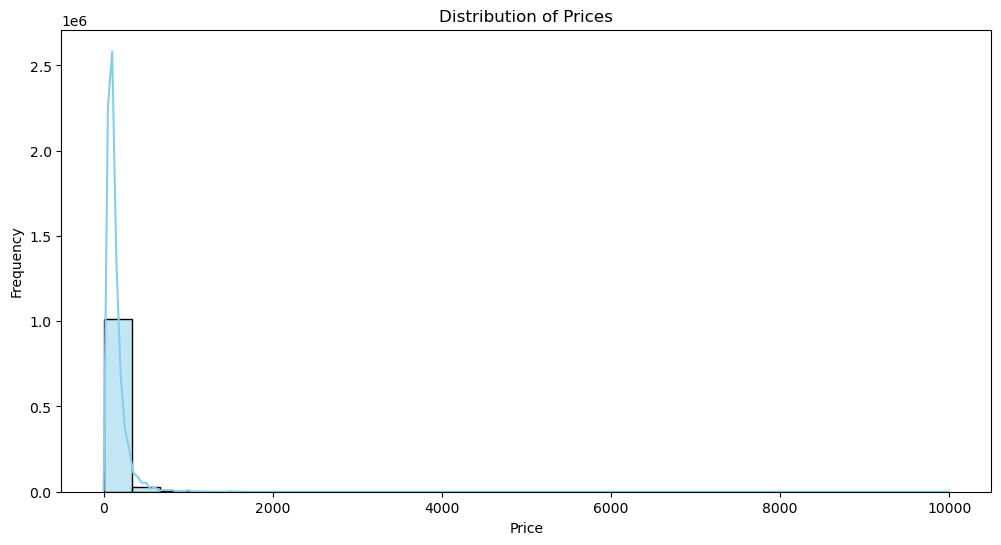

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

# Distribution of star ratings

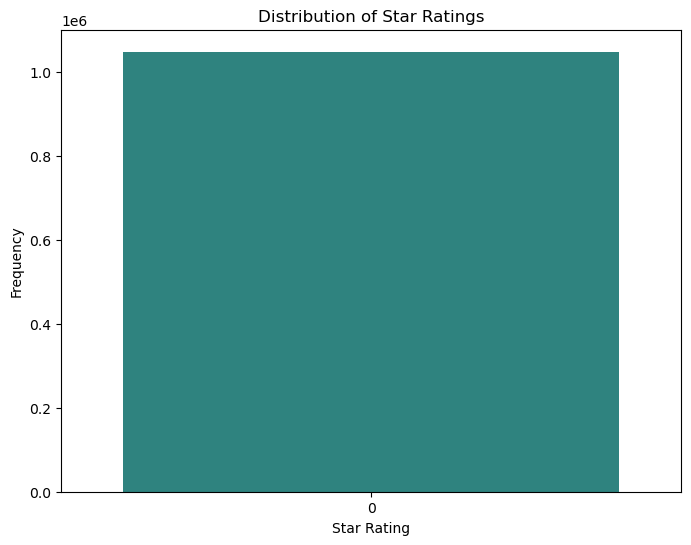

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Star_rating_scale5'], palette='viridis')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()


# Number of reviews vs Price

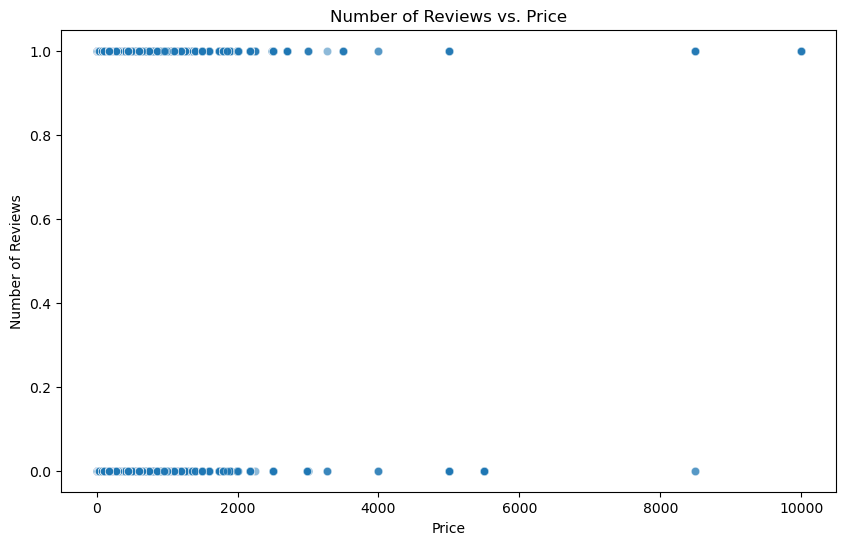

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='RevHasHostName', data=data, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs. Price')
plt.show()


# Room Type Distribution

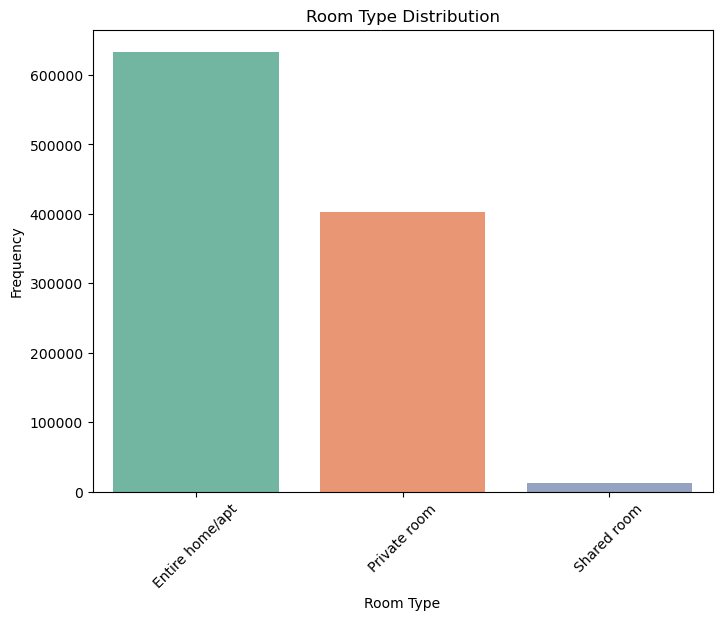

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='room_type', palette='Set2')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()


# Property type distribution

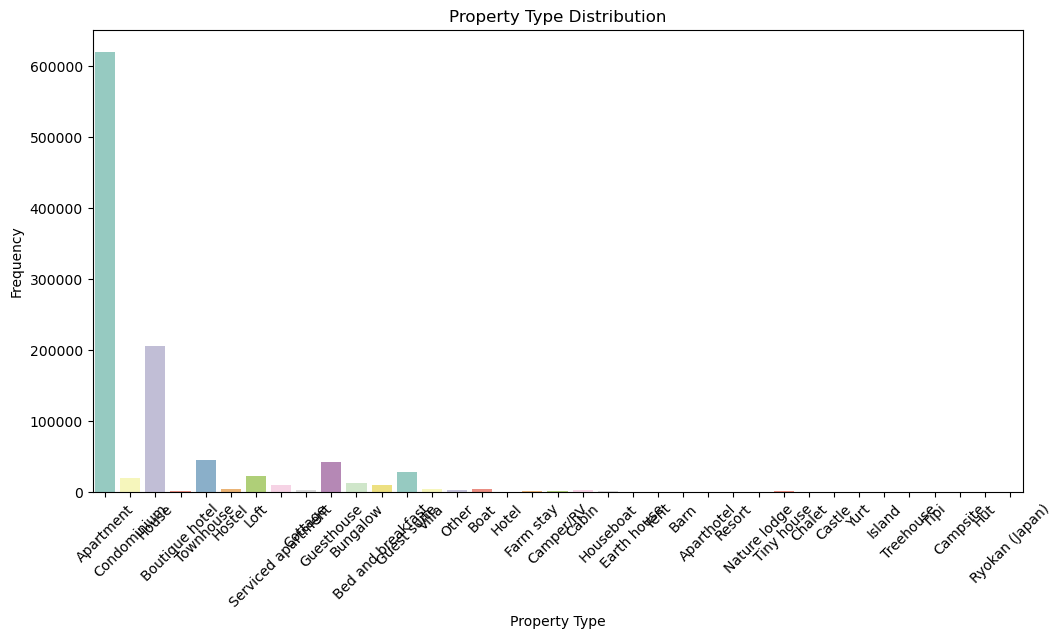

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='property_type', palette='Set3')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Property Type Distribution')
plt.xticks(rotation=45)
plt.show()


# Data Preparation

In [27]:
# Encode categorical variables
encoder = LabelEncoder()
data_cleaned['room_type_encoded'] = encoder.fit_transform(data_cleaned['room_type'])
data_cleaned['property_type_encoded'] = encoder.fit_transform(data_cleaned['property_type'])
data_cleaned['market_encoded'] = encoder.fit_transform(data_cleaned['market'])

In [28]:
# Select features and target variable
X = data_cleaned[['room_type_encoded', 'property_type_encoded', 'market_encoded', 'price']]
y = data_cleaned['Star_rating_scale5']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor

In [30]:
# Train a machine learning model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.03059563604350062
R-squared Score: 0.3415491506902517


# Linear regression model

In [40]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)
print("R-squared Score (Linear Regression):", r2)

Mean Squared Error (Linear Regression): 0.04579516801873199
R-squared Score (Linear Regression): 0.01443894700067061


# Gradient Boosting Regressor model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
# Train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Gradient Boosting):", mse)
print("R-squared Score (Gradient Boosting):", r2)

Mean Squared Error (Gradient Boosting): 0.04102044079269001
R-squared Score (Gradient Boosting): 0.11719618965905887
